# 互评作业1: 数据探索性分析与数据预处理

## 数据集GitHub Dataset

### 此数据集包含两个csv文件：  
·github_dataset.csv 包含 6 列和 1052 行GitHub存储库数据   
·repository_data.csv 包含 9 列和 2917951 行GitHub存储库数据   
**以repository_data.csv为例进行数据探索性分析与数据预处理**

In [1]:
# 导入必要的包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
from collections import Counter
from math import isnan
%matplotlib inline

### 1.数据集展示

In [2]:
#载入数据
f_data="dataset/GitHub Dataset/repository_data.csv"
data = pd.read_csv(f_data, index_col = False)
data.head()# 默认展示前五行数据

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"['TypeScript', 'JavaScript', 'CSS', 'Shell', '...",32231.0,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,NaN,NaN,3189.0,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,NaN,NaN,8286.0,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,NaN,NaN,2314.0,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,NaN,NaN,1074.0,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal


In [3]:
data.dtypes # 每列数据的数据类型

name                 object
stars_count           int64
forks_count           int64
watchers              int64
pull_requests         int64
primary_language     object
languages_used       object
commit_count        float64
created_at           object
licence              object
dtype: object

In [4]:
# 数据集的含义
# 列名----------------含义
# name                仓库的名字（标称）
# stars_count         星数（数值）
# forks_count         分支数（数值）
# watchers            观看者（数值）
# pull_requests       拉取请求计数（数值）
# primary_language    主要语言（标称）
# languages_used      使用的所有语言列表（标称）
# commit_count        仓库提交次数（数值）
# created_at          时间戳（标称）
# licence             许可证（标称）

In [5]:
data.shape # 数据集的大小

(2917951, 10)

### 2.数据分析

#### 2.1数据摘要和可视化

##### 2.1.1数据摘要  
  ·标称属性，给出每个可能取值的频数  
  ·数值属性，给出5数概括及缺失值的个数  

##### 标称属性  
由数据集展示可知该数据集标称属性共有5个，分别为：  
name,primary_language,languages_used,created_at,license  
下面给出每个属性取值的频数 

In [6]:
#(1)name
data["name"].value_counts()

dotfiles                                 5590
blog                                     2038
docs                                     1350
website                                  1163
scripts                                   649
                                         ... 
markdown-to-presentation                    1
moodle-client                               1
event-sourcing-graph                        1
react-native-100-Demos                      1
MSI-Z690-Carbon-i7-12700KF-Hackintosh       1
Name: name, Length: 2410863, dtype: int64

In [7]:
#(2)primary_language
data["primary_language"].value_counts()

JavaScript              451954
Python                  451473
Java                    202394
C++                     150066
PHP                     116058
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: primary_language, Length: 497, dtype: int64

In [8]:
#(3)languages_used
data["languages_used"].value_counts()

['Python']                                                        257679
['JavaScript']                                                    157741
['Java']                                                          117624
['C#']                                                             60299
['PHP']                                                            56333
                                                                   ...  
['Svelte', 'TypeScript', 'JavaScript', 'HTML', 'CSS', 'Rust']          1
['Dockerfile', 'Shell', 'JavaScript', 'PowerShell']                    1
['TypeScript', 'HTML', 'Vue', 'JavaScript', 'Python', 'Shell']         1
['C++', 'C', 'Pascal', 'Batchfile', 'GDB']                             1
['HTML', 'C++', 'TypeScript', 'JavaScript']                            1
Name: languages_used, Length: 328148, dtype: int64

In [9]:
#(4)created_at
data["created_at"].value_counts()

2017-06-05T20:53:54Z    10
2017-06-05T20:53:58Z     9
2014-01-17T08:00:09Z     8
2010-05-26T23:38:08Z     7
2019-03-29T08:13:35Z     7
                        ..
2017-09-04T07:45:10Z     1
2017-08-21T11:35:16Z     1
2017-08-09T00:50:43Z     1
2017-10-07T13:05:26Z     1
2022-01-22T00:00:12Z     1
Name: created_at, Length: 2837008, dtype: int64

In [10]:
#(5)licence
data["licence"].value_counts()

MIT License                                                   784251
Apache License 2.0                                            210698
Other                                                         167987
GNU General Public License v3.0                               159443
BSD 3-Clause "New" or "Revised" License                        47078
GNU General Public License v2.0                                43297
GNU Affero General Public License v3.0                         21554
BSD 2-Clause "Simplified" License                              16819
The Unlicense                                                  14400
GNU Lesser General Public License v3.0                         14002
Mozilla Public License 2.0                                     10668
Creative Commons Zero v1.0 Universal                           10353
ISC License                                                     8232
GNU Lesser General Public License v2.1                          6168
Eclipse Public License 1.0        

##### 数值属性  
数值属性共有5个，分别为：  
stars_count,forks_count,watchers,pull_requests,commit_count  
下面给出每个属性的5数概括及缺失值的个数  

In [11]:
# 用 describe 函数对数值数据的 5 数进行概括
digital_data = ['stars_count','forks_count','watchers','pull_requests','commit_count']
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.2f'%x) # 小数点后面保留2位小数
data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2916030.00
mean,76.41,20.95,7.14,24.31,614.37
std,909.68,302.95,37.62,378.44,16808.01
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


In [12]:
# 给出数值数据缺失值的个数
data[digital_data].isnull().sum()

stars_count         0
forks_count         0
watchers            0
pull_requests       0
commit_count     1921
dtype: int64

##### 2.1.1数据可视化  
·使用直方图、盒图等检查数据分布及离群点  

In [13]:
#定义标称属性可视化函数
def nom_attri_vis(attri):
    data[attri].value_counts()[:80].plot(kind="bar",figsize=(12,3))

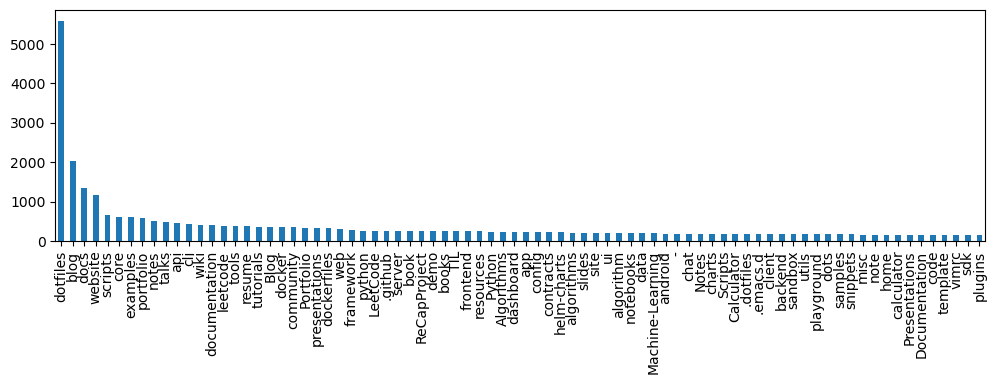

In [14]:
#(1)name
attri = 'name'
nom_attri_vis(attri)

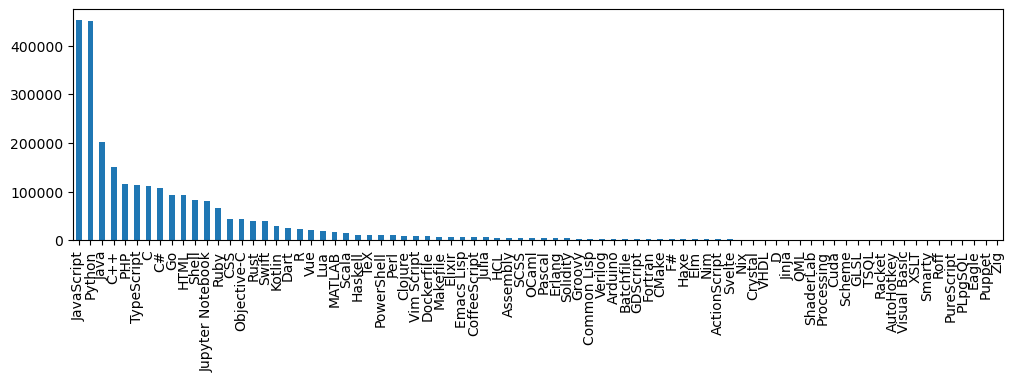

In [15]:
#(2)primary_language
attri = 'primary_language'
nom_attri_vis(attri)

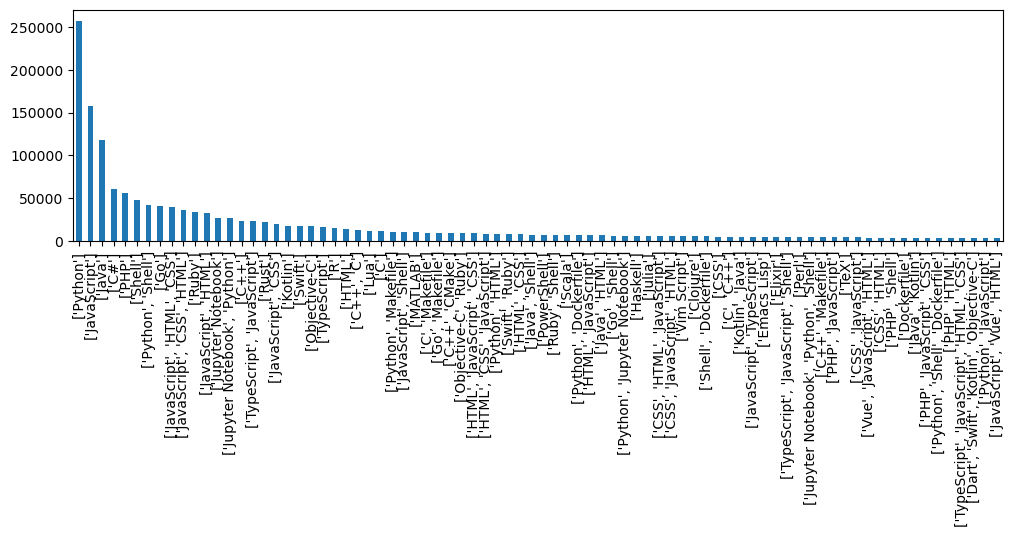

In [16]:
#(3)languages_used
attri = 'languages_used'
nom_attri_vis(attri)

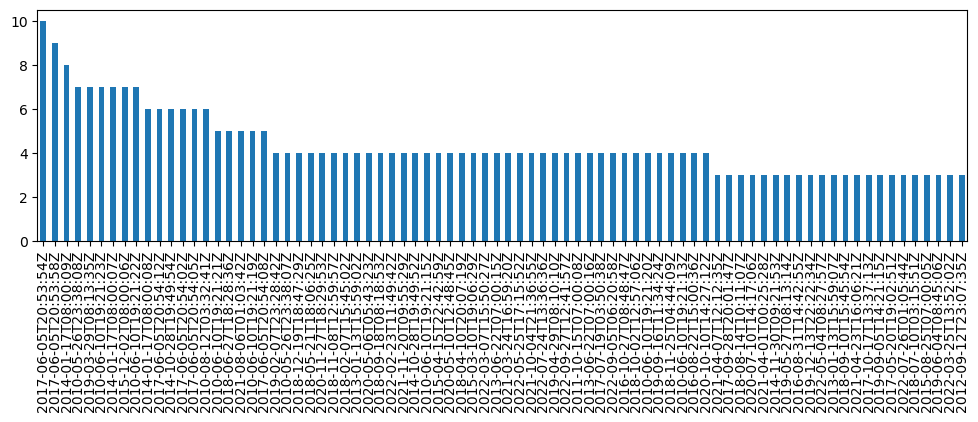

In [17]:
#(4)created_at
attri = 'created_at'
nom_attri_vis(attri)

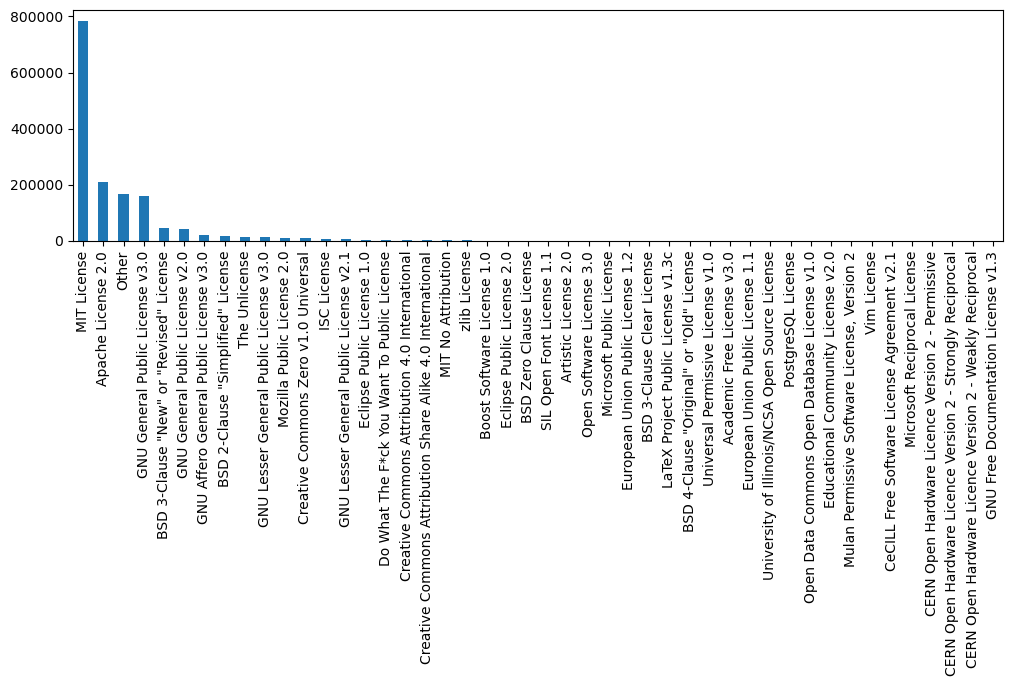

In [18]:
#(5)licence
attri = 'licence'
nom_attri_vis(attri)

In [19]:
#定义数值属性可视化函数
def num_attri_vis(attri):
    # coding=utf-8
    plt.figure(figsize = (10,10))
    # 直方图
    plt.subplot(2,2,1)
    title = attri + " hist"
    plt.title(title)
    data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数

    # 盒图
    plt.subplot(2,2,2)
    title = attri + " box"
    plt.title(title)
    p = data.boxplot([attri],return_type='dict')

    #q-q 图
    plt.subplot(2,2,3)
    stats.probplot(data[attri],dist="norm",plot=plt)
    
    # 若有离群点则输出去除后的直方图
    if p:
        minfliers = min(p['fliers'][0].get_ydata())
        
        # 去除离群点后重新绘制直方图
        plt.subplot(2,2,4)
        plt.title(attri + " hist without outliers")
        data[attri].hist(alpha=0.5,bins=15,range=(0,minfliers)) #alpha 透明度，bins 竖条数
    
    plt.show()
    
    if p:
        # 检查离群点
        print("离群点如下：\n",p['fliers'][0].get_ydata())

分别对上述5个数值属性绘制直方图、盒图和q-q图，并检查离群点 

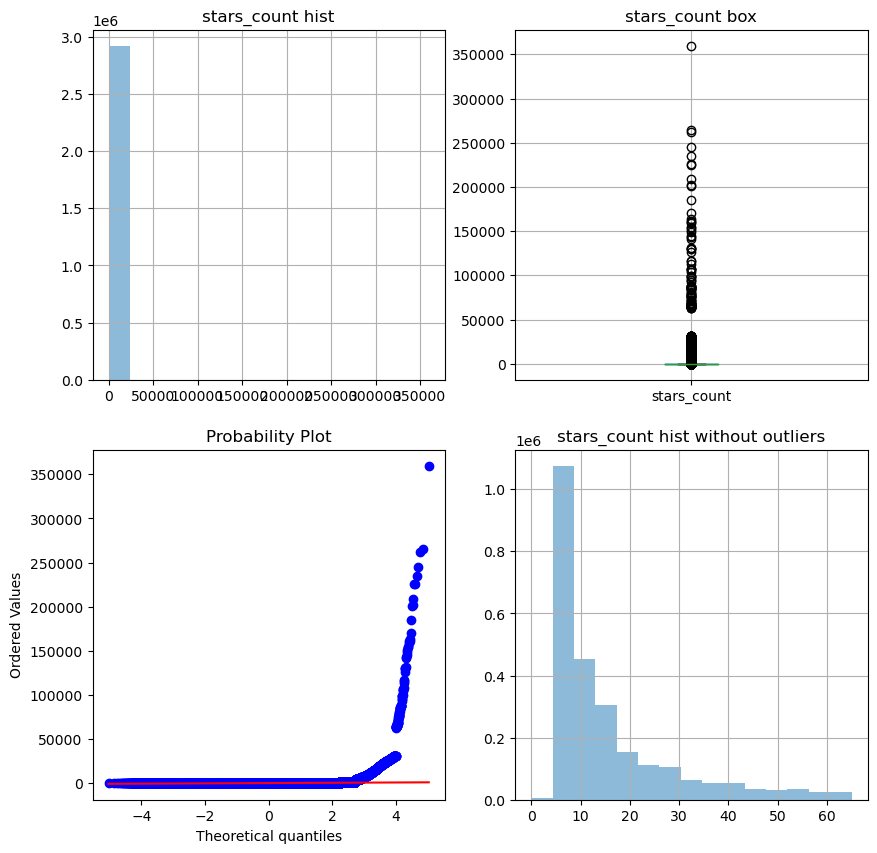

离群点如下：
 [359805 264811 262380 ... 65 66 74]


In [20]:
#(1)stars_count
attri = 'stars_count'
num_attri_vis(attri)

由去除离群点后的直方图可知，stars_count属性基本服从指数分布

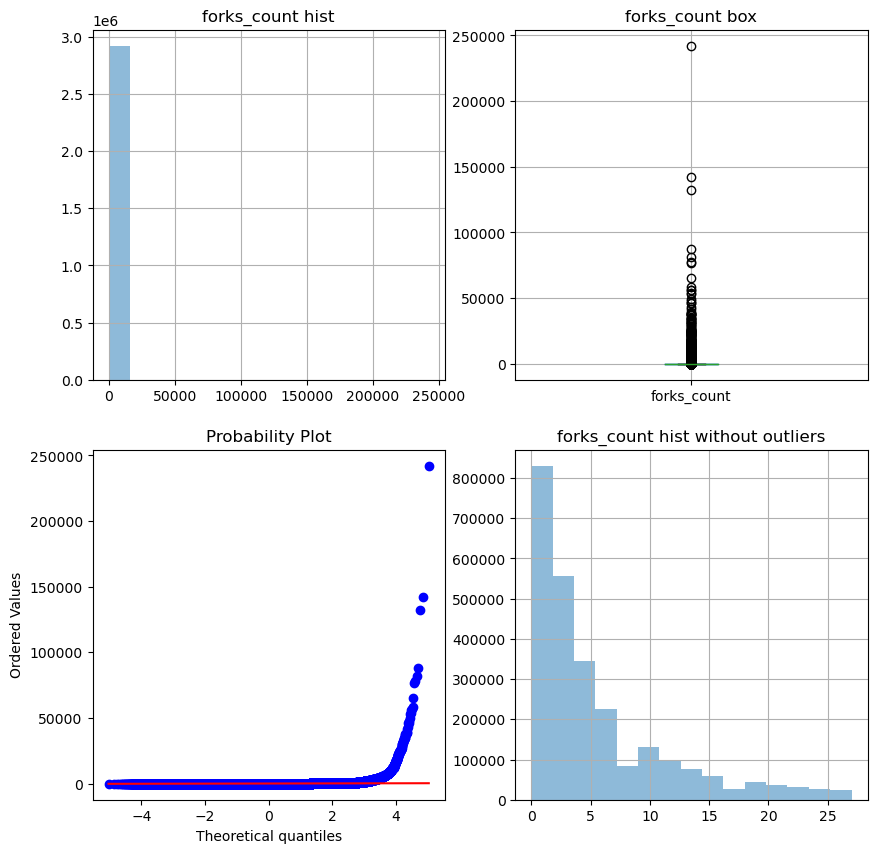

离群点如下：
 [30814 21470 53302 ... 48 31 27]


In [21]:
#(2)forks_count
attri = 'forks_count'
num_attri_vis(attri)

由去除离群点后的直方图可知，forks_count属性基本服从指数分布

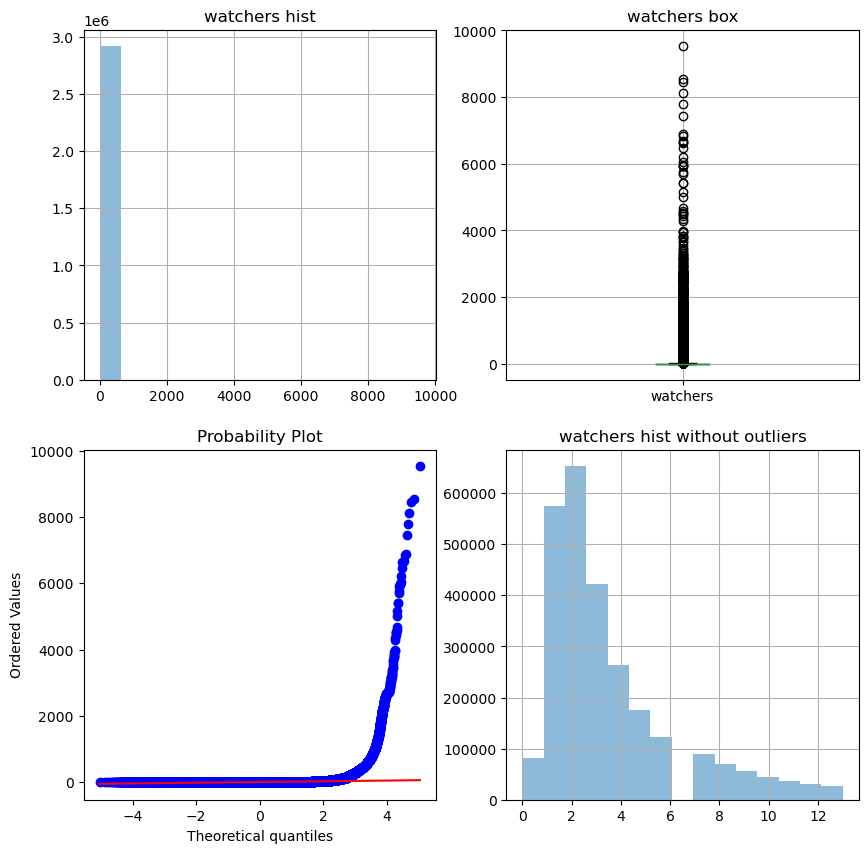

离群点如下：
 [8448 4298 9544 ... 15 13 21]


In [22]:
#(3)watchers
attri = 'watchers'
num_attri_vis(attri)

由去除离群点后的直方图可知，watchers属性基本服从指数分布

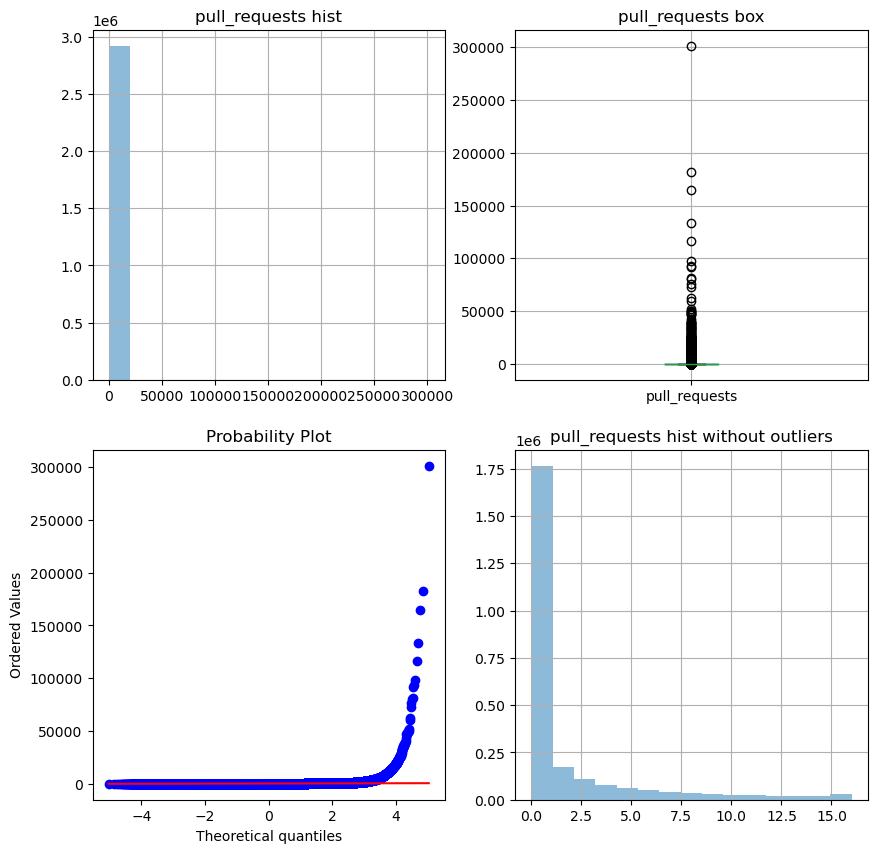

离群点如下：
 [31867 1949 8235 ... 29 16 99]


In [23]:
#(4)pull_requests
attri = 'pull_requests'
num_attri_vis(attri)

由去除离群点后的直方图可知，pull_requests属性基本服从指数分布

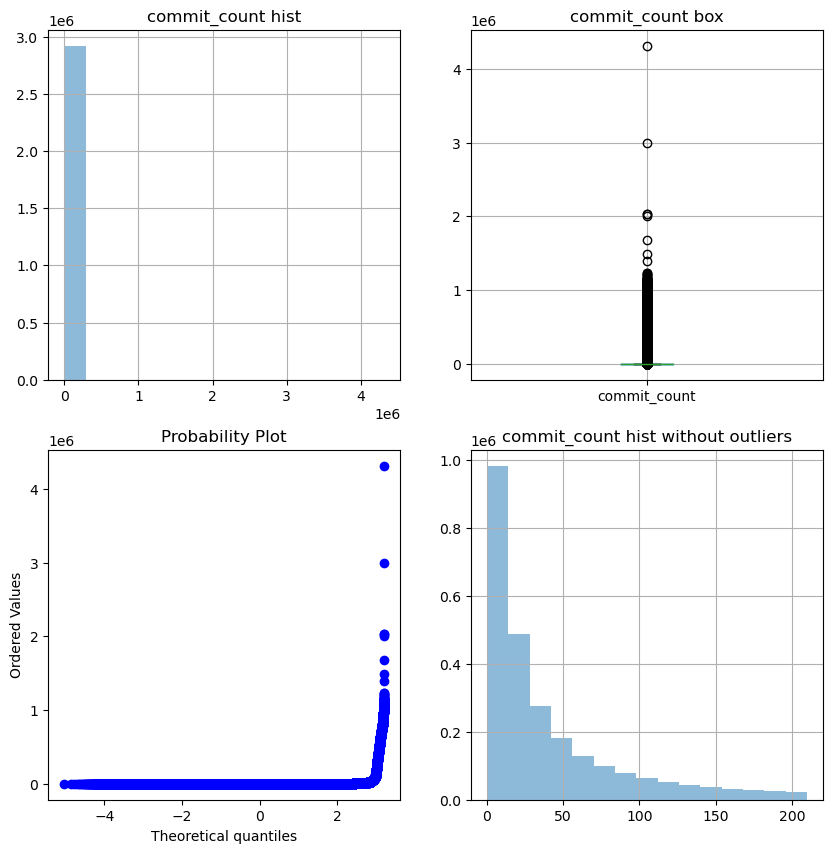

离群点如下：
 [32231.0 3189.0 8286.0 ... 2222.0 312.0 504.0]


In [24]:
#(5)commit_count
attri = 'commit_count'
num_attri_vis(attri)

由去除离群点后的直方图可知，commit_count属性基本服从指数分布

#### 2.2数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:  
  ·将缺失部分剔除  
  ·用最高频率值来填补缺失值  
  ·通过属性的相关关系来填补缺失值  
  ·通过数据对象之间的相似性来填补缺失值  
注意：在处理后完成，要对比新旧数据集的差异。  

In [25]:
#检查数据缺失情况
data.isnull().sum()

name                     12
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     218573
languages_used       221984
commit_count           1921
created_at                0
licence             1378200
dtype: int64

In [26]:
 # 查看属性的相关关系
data.corr()

,stars_count,forks_count,watchers,pull_requests,commit_count
stars_count,1.00,0.57,0.71,0.19,0.02
forks_count,0.57,1.00,0.49,0.21,0.02
watchers,0.71,0.49,1.00,0.16,0.02
pull_requests,0.19,0.21,0.16,1.00,0.05
commit_count,0.02,0.02,0.02,0.05,1.00


标称属性中primary_language, languages_used, licence存在数据缺失问题.  
数值属性中commit_count属性存在数据缺失问题。  
这里缺失的原因可能是由于未完全记录、遗漏或无法获取。  
接下来用四种方案处理数据缺失问题。  

In [27]:
#定义新旧数据集对比函数
def cmp(attri):
    # 可视化对比新旧数据
    plt.figure(figsize = (10,20))
    
    # 直方图
    plt.subplot(4,2,1)
    plt.title(attri + " hist")
    data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数
    # 直方图
    plt.subplot(4,2,2)
    plt.title("new " + attri + " hist")
    new_data[attri].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数
    
    # 盒图
    plt.subplot(4,2,3)
    plt.title(attri + " box")
    p = data.boxplot([attri],return_type='dict')
    # 盒图
    plt.subplot(4,2,4)
    plt.title("new " + attri + " box")
    new_p = new_data.boxplot([attri],return_type='dict')
    
    #q-q 图
    plt.subplot(4,2,5)
    stats.probplot(data[attri],dist="norm",plot=plt)
    plt.subplot(4,2,6)
    stats.probplot(new_data[attri],dist="norm",plot=plt)
    
    if p and new_p:
        # 检查缺失值处理后的离群点
        minfliers = min(p['fliers'][0].get_ydata())
        dn_minfliers = min(new_p['fliers'][0].get_ydata())
        # 去除离群点后重新绘制直方图
        plt.subplot(4,2,7)
        plt.title(attri + " hist without outliers")
        data[attri].hist(alpha=0.5,bins=15,range=(0,minfliers)) #alpha 透明度，bins 竖条数
        # 去除离群点后重新绘制缺失值处理后的直方图
        plt.subplot(4,2,8)
        plt.title("new" + attri + " hist without outliers")
        new_data[attri].hist(alpha=0.5,bins=15,range=(0,dn_minfliers)) #alpha 透明度，bins 竖条数
    
    plt.show()
    
    if p and new_p:
        # 检查离群点
        print("原离群点如下：\n",p['fliers'][0].get_ydata())
        print("新离群点如下：\n",new_p['fliers'][0].get_ydata())

##### 方案一 将缺失部分剔除

**name属性和commit_count属性缺失值占总体样本数比例较小，直接剔除后对数据集影响不大，因此直接剔除处理。**  
**primary_language, languages_used等属性缺失值占一定的总体样本比例，可以尝试直接剔除并观察效果**  
**licence属性缺失值占总体样本比例的一半左右，直接剔除对数据集影响很大，不采用将缺失数据剔除方案**

**直接剔除name和commit_count属性缺失的数据**  

In [28]:
new_data = data.copy(deep=True)
new_data = new_data.dropna(subset=['name'])
new_data = new_data.dropna(subset=['commit_count'])
new_data.isnull().sum()

name                      0
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     216652
languages_used       220063
commit_count              0
created_at                0
licence             1376272
dtype: int64

In [29]:
#对比新旧数据
digital_data = ['stars_count','forks_count','watchers','pull_requests','commit_count']
data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2916030.00
mean,76.41,20.95,7.14,24.31,614.37
std,909.68,302.95,37.62,378.44,16808.01
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


In [30]:
new_data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2916018.00,2916018.00,2916018.00,2916018.00,2916018.00
mean,76.45,20.96,7.14,24.32,614.37
std,909.98,303.05,37.63,378.57,16808.04
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


处理前后数值数据的五数没有变化

**尝试剔除primary_language, languages_used属性缺失的数据并比较数据集变化**  

In [31]:
new_data_language = new_data.copy(deep=True)
new_data_language = new_data_language.dropna(subset=['primary_language'])
new_data_language = new_data_language.dropna(subset=['languages_used'])
new_data_language.isnull().sum()

name                      0
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language          0
languages_used            0
commit_count              0
created_at                0
licence             1224338
dtype: int64

In [32]:
#对比新旧数据
digital_data = ['stars_count','forks_count','watchers','pull_requests','commit_count']
data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2916030.00
mean,76.41,20.95,7.14,24.31,614.37
std,909.68,302.95,37.62,378.44,16808.01
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


In [33]:
new_data_language[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2695950.00,2695950.00,2695950.00,2695950.00,2695950.00
mean,75.51,20.63,7.01,25.50,629.15
std,837.69,254.54,35.29,385.73,16953.19
min,3.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,10.00
50%,12.00,4.00,3.00,1.00,29.00
75%,30.00,11.00,6.00,6.00,94.00
max,359805.00,141905.00,8448.00,301585.00,4314502.00


处理前后数值数据五数变化较小，缺失数据的剔除对整体数据集影响较小

##### 方案二 用最高频率值来填补缺失值

**name属性和commit_count属性缺失值占总体样本数比例较小，用最高频率值来填补后对数据集影响不大**  
**primary_language, languages_used等属性缺失值占一定的总体样本比例，可以尝试用最高频率值来填补并观察效果**  
**licence属性缺失值占总体样本比例的一半左右，用最高频率值来填补对数据集影响很大，不采用最高频率值填补方案**

In [34]:
# 用最高频率来填补name,commit_count缺失值
attri = ['name', 'commit_count']
new_data = data.copy(deep=True)

i=0
word_counts = Counter(new_data[attri[i]])
top = word_counts.most_common(1)[0][0]
print("The most frequency value is:",top)
new_data[attri[i]] = new_data[attri[i]].fillna(top)

i=1
word_counts = Counter(new_data[attri[i]])
top = word_counts.most_common(1)[0][0]
print("The most frequency value is:",top)
new_data[attri[i]] = new_data[attri[i]].fillna(top)

new_data.isnull().sum()

The most frequency value is: dotfiles
The most frequency value is: 2.0


name                      0
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     218573
languages_used       221984
commit_count              0
created_at                0
licence             1378200
dtype: int64

In [35]:
#对比新旧数据
digital_data = ['stars_count','forks_count','watchers','pull_requests','commit_count']
data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2916030.00
mean,76.41,20.95,7.14,24.31,614.37
std,909.68,302.95,37.62,378.44,16808.01
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


In [36]:
new_data[digital_data].describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2917951.00,2917951.00,2917951.00,2917951.00,2917951.00
mean,76.41,20.95,7.14,24.31,613.97
std,909.68,302.95,37.62,378.44,16802.48
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


处理前后数值数据的五数没有变化

In [37]:
# 用最高频率来填补primary_language, languages_used缺失值
attri = ['primary_language', 'languages_used']
new_data_language = new_data.copy(deep=True)

i=0
word_counts = Counter(new_data_language[attri[i]])
top = word_counts.most_common(1)[0][0]
print("The most frequency value is:",top)
new_data_language[attri[i]] = new_data_language[attri[i]].fillna(top)

i=1
word_counts = Counter(new_data_language[attri[i]])
top = word_counts.most_common(1)[0][0]
print("The most frequency value is:",top)
new_data_language[attri[i]] = new_data_language[attri[i]].fillna(top)

new_data_language.isnull().sum()

The most frequency value is: JavaScript
The most frequency value is: ['Python']


name                      0
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language          0
languages_used            0
commit_count              0
created_at                0
licence             1378200
dtype: int64

<AxesSubplot:>

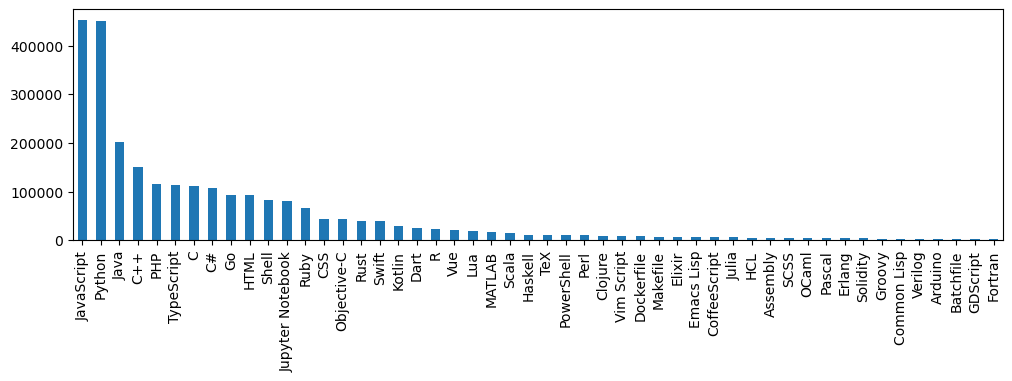

In [38]:
#对比处理前后的primary_language直方图
data['primary_language'].value_counts()[:50].plot(kind="bar",figsize=(12,3))

<AxesSubplot:>

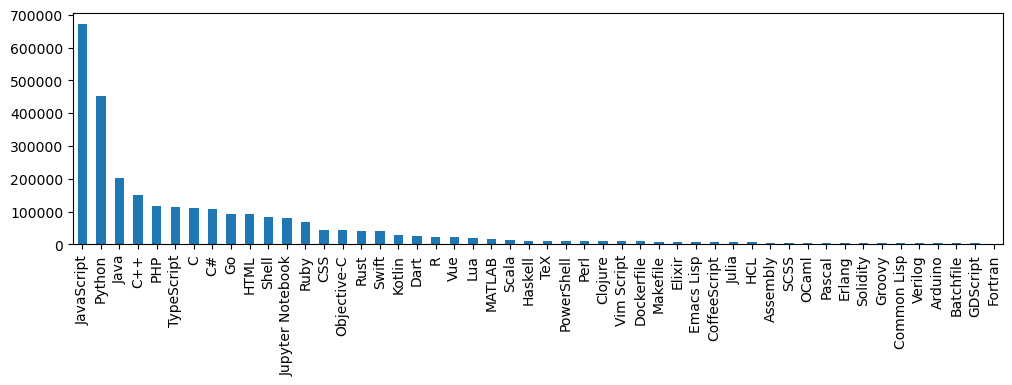

In [39]:
new_data_language['primary_language'].value_counts()[:50].plot(kind="bar",figsize=(12,3))

<AxesSubplot:>

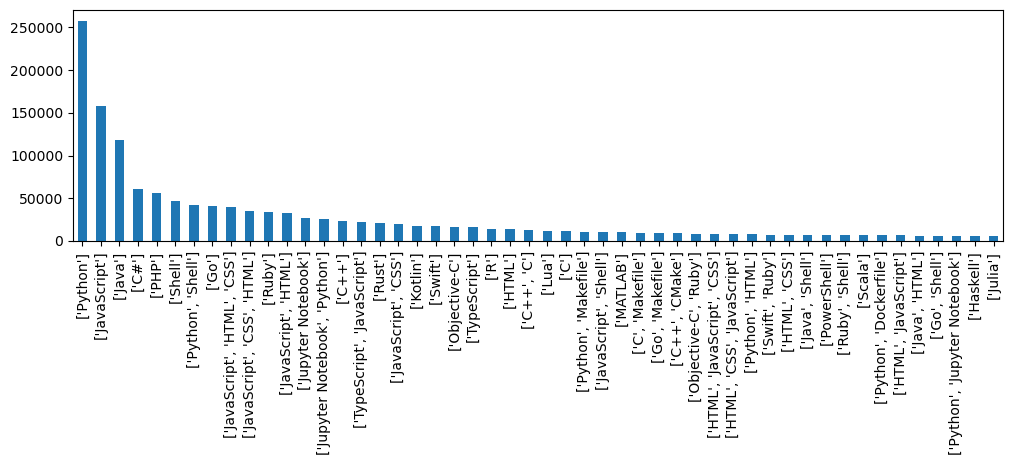

In [40]:
#对比处理前后的languages_used直方图
data['languages_used'].value_counts()[:50].plot(kind="bar",figsize=(12,3))

<AxesSubplot:>

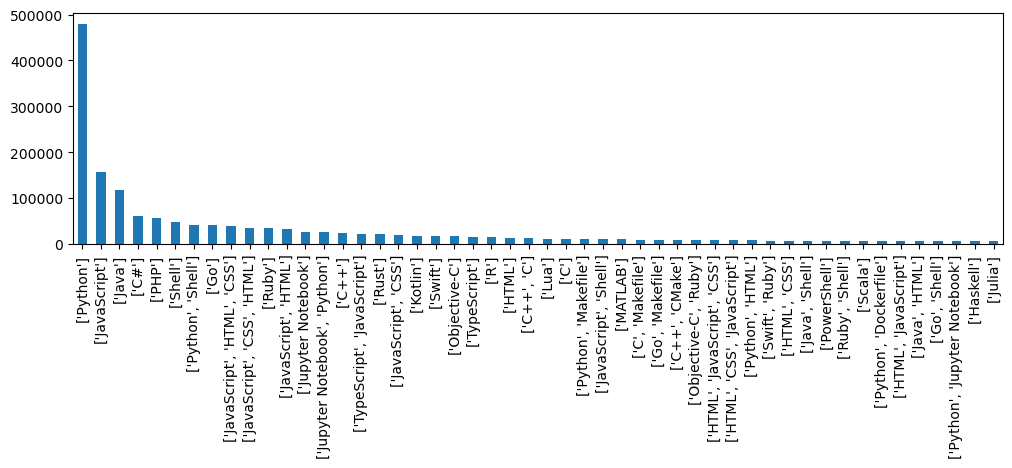

In [41]:
new_data_language['languages_used'].value_counts()[:50].plot(kind="bar",figsize=(12,3))

处理前后直方图整体形状变化不大，最高频率数据的高度变高。

##### 方案三 通过属性的相关关系来填补缺失值

In [42]:
# 查看相关的属性关系
data.corr()

,stars_count,forks_count,watchers,pull_requests,commit_count
stars_count,1.00,0.57,0.71,0.19,0.02
forks_count,0.57,1.00,0.49,0.21,0.02
watchers,0.71,0.49,1.00,0.16,0.02
pull_requests,0.19,0.21,0.16,1.00,0.05
commit_count,0.02,0.02,0.02,0.05,1.00


In [43]:
#通过属性的相关关系来填补缺失值
attri = ['commit_count']
new_data = data.copy(deep=True)
target_data = new_data['commit_count'].copy(deep=False)
source_data = new_data['pull_requests'].copy(deep=False)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 26 + source_data[i]
    i=i+1

In [44]:
data[attri].describe()# 原数据的 5 数概况

,commit_count
count,2916030.00
mean,614.37
std,16808.01
min,1.00
25%,9.00
50%,27.00
75%,89.00
max,4314502.00


In [45]:
new_data[attri].describe()# 通过属性的相关关系来填补缺失值后数据的 5 数概况

,commit_count
count,2917951.00
mean,613.98
std,16802.48
min,1.00
25%,9.00
50%,27.00
75%,89.00
max,4314502.00


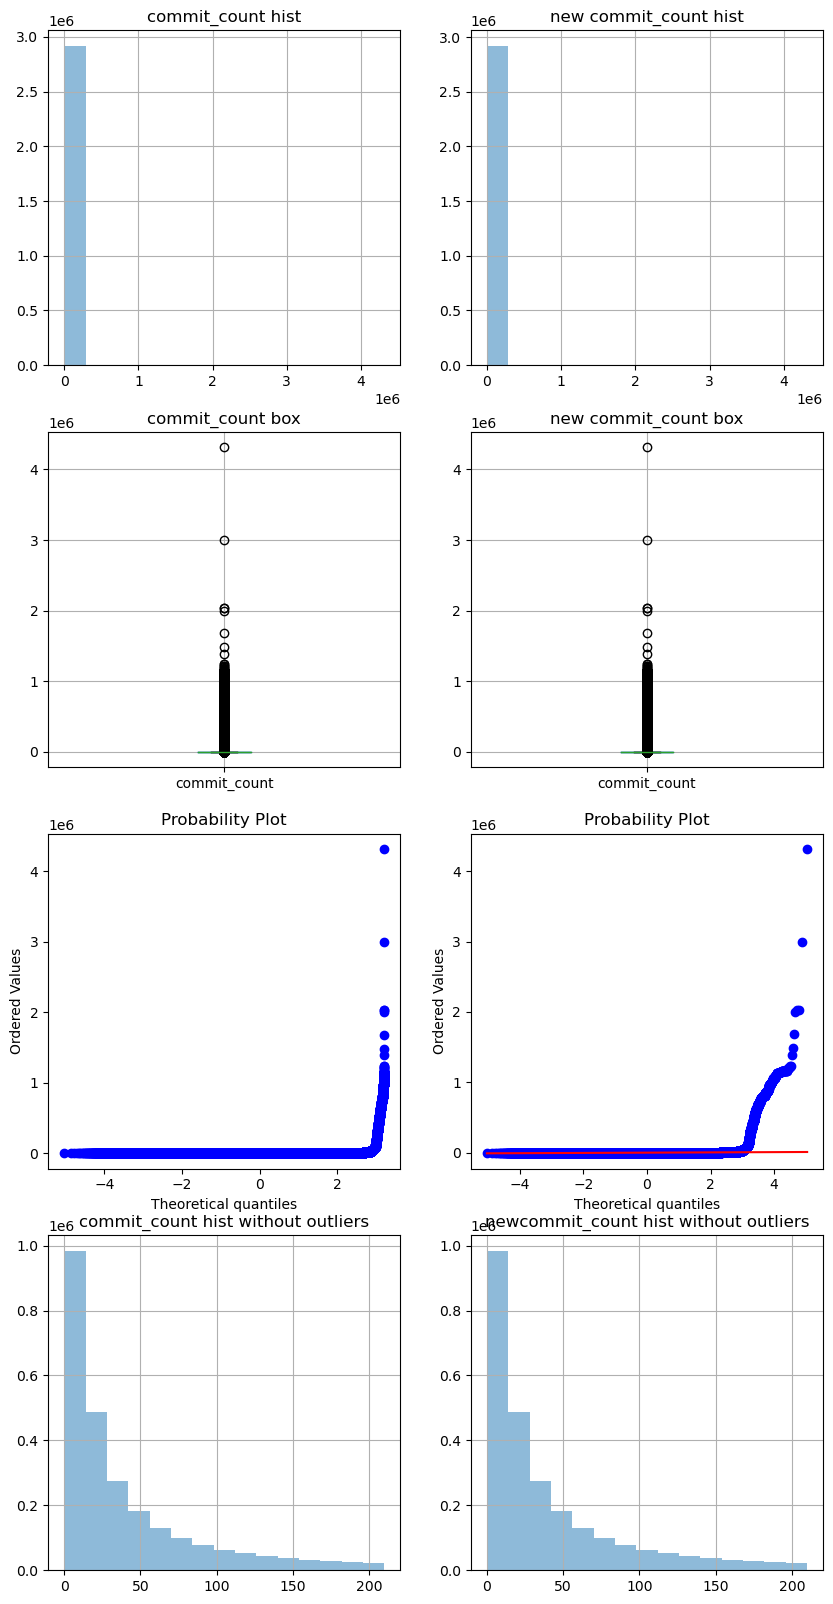

原离群点如下：
 [32231.0 3189.0 8286.0 ... 2222.0 312.0 504.0]
新离群点如下：
 [32231.0 3189.0 8286.0 ... 2222.0 312.0 504.0]


In [46]:
#可视化对比新旧数据
cmp(attri[0])

用相关性最高的的属性pull_requests处理后，均值略微减小，方差略微减小。直方图基本没有变化而q-q图改变比较大。

##### 方案四 通过数据对象之间的相似性来填补缺失值

In [47]:
numeric_attr = ['commit_count','pull_requests']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'pull_requests':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补Data_Value缺失值
new_data = data.copy(deep=True)
# numical_datasets = pd.DataFrame(new_data[numeric_attr].copy(deep=False))
numical_datasets = new_data[numeric_attr].copy(deep=False)

#对numical_datasets排序
numical_datasets.sort_values("pull_requests",inplace=True)
data_new = numical_datasets['commit_count'].copy(deep=False)

print('空数据数量为:',data_new.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['commit_count'].iloc[i]):
         result_pos = find_dis_value(numical_datasets, i, numeric_attr)
         data_new.iloc[i] = data_new.iloc[result_pos]
         count+=1
    
#填充后的空数据数量
print('填充后的空数据数量为:',data_new.isnull().sum())

空数据数量为: 1921
填充后的空数据数量为: 0


In [48]:
data[attri].describe()# 原数据的 5 数概况

,commit_count
count,2916030.00
mean,614.37
std,16808.01
min,1.00
25%,9.00
50%,27.00
75%,89.00
max,4314502.00


In [49]:
data_new.describe()# 最高频率来填补缺失值后数据的 5 数概况

count   2917951.00
mean        613.97
std       16802.48
min           1.00
25%           9.00
50%          27.00
75%          89.00
max     4314502.00
Name: commit_count, dtype: float64

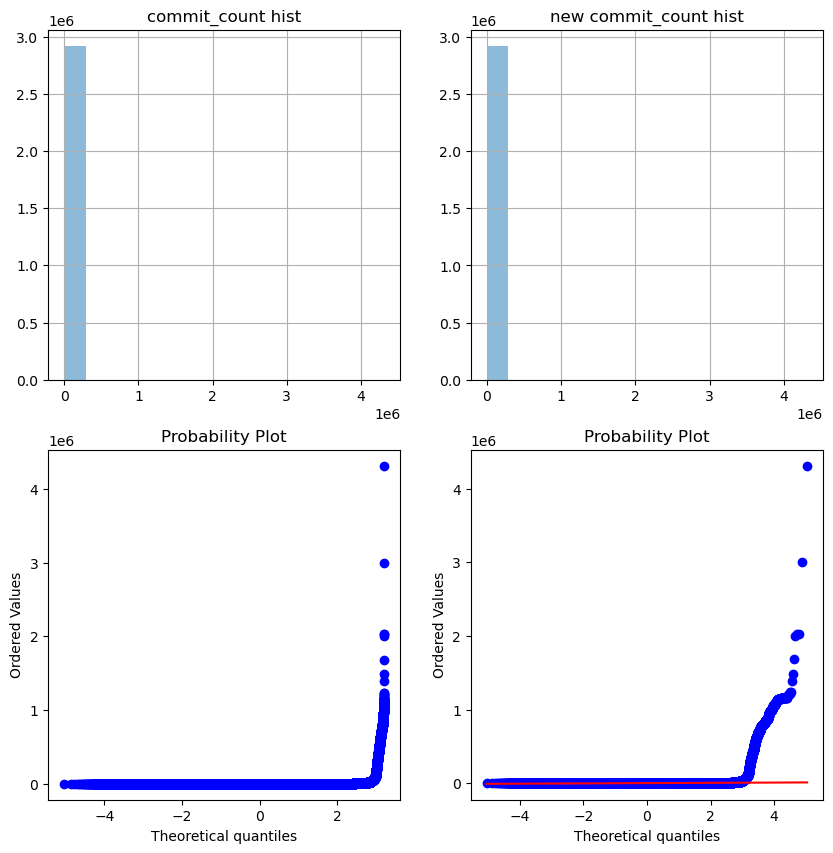

In [50]:
# 可视化对比新旧数据
plt.figure(figsize = (10,10))

# 直方图
plt.subplot(2,2,1)
plt.title("commit_count hist")
data['commit_count'].hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数
# 直方图
plt.subplot(2,2,2)
plt.title("new commit_count hist")
data_new.hist(alpha=0.5,bins=15) #alpha 透明度，bins 竖条数

#q-q 图
plt.subplot(2,2,3)
stats.probplot(data['commit_count'],dist="norm",plot=plt)
plt.subplot(2,2,4)
stats.probplot(data_new,dist="norm",plot=plt)

plt.show()